In [ ]:
### Problem 1 – State Evolution for ∣Ψ⟩=HZH∣0⟩

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import imageio.v2 as imageio

# --------------------------
# 1. Define basis states
# --------------------------
# Computational basis:
# |0> = [1, 0]^T
# |1> = [0, 1]^T
ket0 = np.array([[1], [0]], dtype=complex)   # |0>
ket1 = np.array([[0], [1]], dtype=complex)   # |1>


# --------------------------
# 2. Define single-qubit gates
# --------------------------
# Hadamard gate:
# H = (1/sqrt(2)) * [[1,  1],
#                    [1, -1]]
H = (1 / np.sqrt(2)) * np.array([[1,  1],
                                 [1, -1]], dtype=complex)

# Pauli-Z gate:
# Z = [[ 1,  0],
#      [ 0, -1]]
Z = np.array([[1,  0],
              [0, -1]], dtype=complex)


# --------------------------
# 3. Helper: pretty-print a state
# --------------------------
def pretty_print_state(label, state):
    """
    Print the quantum state in:
      - vector form [a0, a1]^T
      - Dirac form: |ψ> = a|0> + b|1>
      - measurement probabilities P(0) and P(1)
    """
    a0 = state[0, 0]  # amplitude of |0>
    a1 = state[1, 0]  # amplitude of |1>
    print(f"{label}:")
    print(f"  vector = [{a0:+.3f} {a1:+.3f}] (complex)")
    print(f"  => ({a0:.3f})|0> + ({a1:.3f})|1>")
    print(f"  Probabilities: P(0) = {abs(a0)**2:.3f}, P(1) = {abs(a1)**2:.3f}\n")


# --------------------------
# 4. Simulate |Ψ> = H Z H |0>
# --------------------------
states = []

# Step 0: initial state |0>
psi0 = ket0
states.append(("Initial |0>", psi0))

# Step 1: apply first H, |ψ1> = H|0>
psi1 = H @ psi0
states.append(("After H (1st)", psi1))

# Step 2: apply Z, |ψ2> = Z|ψ1>
psi2 = Z @ psi1
states.append(("After ZH", psi2))

# Step 3: apply final H, |ψ3> = H|ψ2> = H Z H |0>
psi3 = H @ psi2
states.append(("After HZH (final)", psi3))

print("=== State evolution for |Ψ> = H Z H |0> ===\n")
for label, st in states:
    pretty_print_state(label, st)


# --------------------------
# 5. Simple correctness check (extra robustness)
# --------------------------
# Expected final state is |1> = [0, 1]^T
expected_final = ket1
if np.allclose(psi3, expected_final):
    print("Correctness check PASSED: final state matches |1>.\n")
else:
    print("Correctness check FAILED: final state does not match |1>.\n")


# --------------------------
# 6. Generate GIF of probability evolution (looping & slow)
# --------------------------
file_tag = "HZH_0"   # safe filename
frames = []

for step_idx, (label, vec) in enumerate(states):
    # Measurement probabilities P(0) and P(1)
    probs = [np.abs(vec[0, 0])**2, np.abs(vec[1, 0])**2]

    # Bar chart for current step
    plt.figure()
    plt.bar(["|0>", "|1>"], probs)
    plt.ylim(0, 1)
    plt.title(label)
    plt.ylabel("Measurement probability")
    plt.tight_layout()

    frame_name = f"frame_{file_tag}_step{step_idx}.png"
    plt.savefig(frame_name)
    plt.close()

    # Read back the frame image for GIF
    frames.append(imageio.imread(frame_name))

gif_name = f"state_evolution_{file_tag}.gif"

# Create a looping, slow GIF
imageio.mimsave(
    gif_name,
    frames,
    duration=1500,   # seconds per frame (adjust if needed)
    loop=0          # infinite loop
)

print(f"Looping slow GIF saved as: {gif_name}")
print("Done.")


# --------------------------
# 7. Simple measurement experiment (extra explanation/experiment)
# --------------------------
import random

def measure_in_computational_basis(state, num_shots=100):
    """
    Simulate measuring the given 1-qubit state in the {|0>, |1>} basis
    for a given number of shots. Returns counts of 0s and 1s.
    """
    a0 = state[0, 0]
    a1 = state[1, 0]
    p0 = abs(a0)**2
    p1 = abs(a1)**2

    counts = {0: 0, 1: 0}
    for _ in range(num_shots):
        outcome = np.random.choice([0, 1], p=[p0, p1])
        counts[outcome] += 1
    return counts

counts = measure_in_computational_basis(psi3, num_shots=200)
print("Measurement experiment on final state (200 shots):", counts)


=== State evolution for |Ψ> = H Z H |0> ===

Initial |0>:
  vector = [+1.000+0.000j +0.000+0.000j] (complex)
  => (1.000+0.000j)|0> + (0.000+0.000j)|1>
  Probabilities: P(0) = 1.000, P(1) = 0.000

After H (1st):
  vector = [+0.707+0.000j +0.707+0.000j] (complex)
  => (0.707+0.000j)|0> + (0.707+0.000j)|1>
  Probabilities: P(0) = 0.500, P(1) = 0.500

After ZH:
  vector = [+0.707+0.000j -0.707+0.000j] (complex)
  => (0.707+0.000j)|0> + (-0.707+0.000j)|1>
  Probabilities: P(0) = 0.500, P(1) = 0.500

After HZH (final):
  vector = [+0.000+0.000j +1.000+0.000j] (complex)
  => (0.000+0.000j)|0> + (1.000+0.000j)|1>
  Probabilities: P(0) = 0.000, P(1) = 1.000

Correctness check PASSED: final state matches |1>.

Looping slow GIF saved as: state_evolution_HZH_0.gif
Done.
Measurement experiment on final state (200 shots): {0: 0, 1: 200}


###Explanation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import imageio.v2 as imageio

# --------------------------
# 1. Define basis states
# --------------------------
# In the computational basis:
# |0> = [1, 0]^T
# |1> = [0, 1]^T
ket0 = np.array([[1], [0]], dtype=complex)   # |0>
ket1 = np.array([[0], [1]], dtype=complex)   # |1>

These represent the computational basis states: ∣0⟩=(10​),∣1⟩=(01​)

These are the fundamental states for one qubit. Every 1-qubit state is of the form: ∣ψ⟩=a∣0⟩+b∣1⟩

In [ ]:
# --------------------------
# 2. Define single-qubit gates
# --------------------------
# Hadamard gate:
# H = (1/sqrt(2)) * [[ 1,  1],
#                    [ 1, -1]]
H = (1 / np.sqrt(2)) * np.array([[1,  1],
                                 [1, -1]], dtype=complex)

# Pauli-Z gate:
# Z = [[ 1,  0],
#      [ 0, -1]]
Z = np.array([[1,  0],
              [0, -1]], dtype=complex)


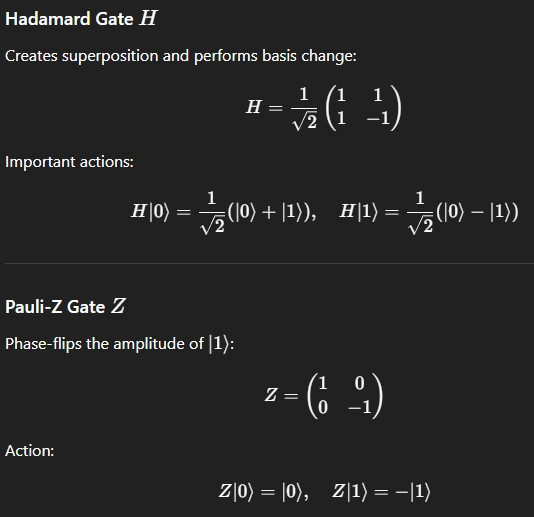

In [ ]:
# --------------------------
# 3. Helper: pretty-print a state
# --------------------------
def pretty_print_state(label, state):
    """
    Print the quantum state in:
      - column vector form
      - Dirac notation form: |ψ> = a|0> + b|1>
      - measurement probabilities for |0> and |1>
    """
    a0 = state[0, 0]  # amplitude for |0>
    a1 = state[1, 0]  # amplitude for |1>
    print(f"{label}:")
    print(f"  vector = [{a0:+.3f} {a1:+.3f}] (complex)")
    print(f"  => ({a0:.3f})|0> + ({a1:.3f})|1>")
    print(f"  Probabilities: P(0) = {abs(a0)**2:.3f}, P(1) = {abs(a1)**2:.3f}\n")

In [ ]:
# --------------------------
# 4. Simulate |Ψ> = H Z H |0>
# --------------------------
states = []

# Step 0: initial state |0>
psi0 = ket0
states.append(("Initial |0>", psi0))

psi0 = ket0
psi1 = H @ psi0
psi2 = Z @ psi1
psi3 = H @ psi2

This corresponds exactly to: ∣Ψ⟩=HZH∣0⟩

Step 0: Initial State 
![image.png](attachment:49f4e259-9a8a-4f9c-b198-1a479b4d5d71.png)

code prints this using:
print("Initial |0>")
pretty_print_state(...)

    
# Step 1: apply first H
# |ψ1> = H |0>
psi1 = H @ psi0
states.append(("After H (1st)", psi1))

# Step 2: apply Z
# |ψ2> = Z |ψ1>
psi2 = Z @ psi1
states.append(("After ZH", psi2))

# Step 3: apply final H
# |ψ3> = H |ψ2> = H Z H |0>
psi3 = H @ psi2
states.append(("After HZH (final)", psi3))

# Print all states with probabilities
print("=== State evolution for |Ψ> = H Z H |0> ===\n")
for label, st in states:
    pretty_print_state(label, st)

    # Step 2: apply Z
# |ψ2> = Z |ψ1>
psi2 = Z @ psi1
states.append(("After ZH", psi2))

# Step 3: apply final H
# |ψ3> = H |ψ2> = H Z H |0>
psi3 = H @ psi2
states.append(("After HZH (final)", psi3))

# Print all states with probabilities
print("=== State evolution for |Ψ> = H Z H |0> ===\n")
for label, st in states:
    pretty_print_state(label, st)

psi0 = ket0

psi1 = H @ psi0

psi2 = Z @ psi1

psi3 = H @ psi2

This corresponds exactly to: ∣Ψ⟩=HZH∣0⟩

Step 0: Initial State 
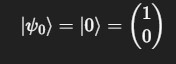

code prints this using:
print("Initial |0>")
pretty_print_state(...)

Step 1: Apply the first H
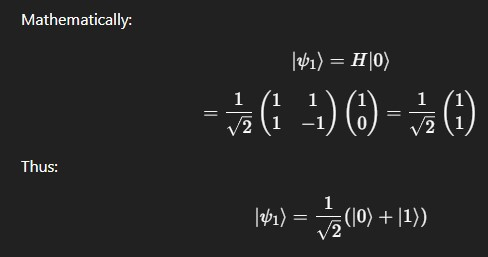
code prints:
vector form
Dirac form
𝑃(0)=0.5, 𝑃(1)=0.5



Step 2: apply z
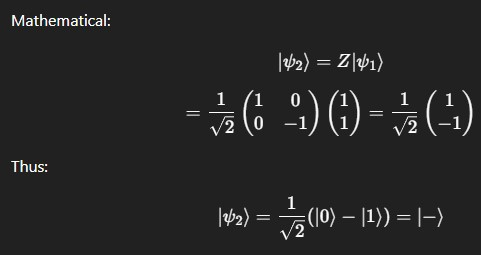

Code prints:
vector = [ +0.707 -0.707 ]
Phase flipped for ∣1⟩

Step 3: Apply final H
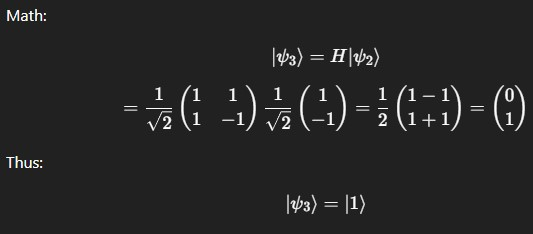
code prints:
vector = [0 1]
P(1) = 1.0

Final Answer: 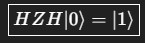


Corresponding Quantum Circuit (Matches the Gates in Code)
|0> ── H ── Z ── H ── |1>
First 
𝐻: creates superposition

𝑍: introduces phase flip

Final 𝐻: interference produces 
∣1⟩

Code prints this numerically and visualizes probabilities

In [ ]:
# --------------------------
# 5. Generate GIF of probability evolution (loop + slower)
# --------------------------
file_tag = "HZH_0"   # safe filename (no special characters)
frames = []

for step_idx, (label, vec) in enumerate(states):
    # Compute measurement probabilities:
    # P(0) = |a0|^2, P(1) = |a1|^2
    probs = [np.abs(vec[0, 0])**2, np.abs(vec[1, 0])**2]

    # Create a bar chart for this step
    plt.figure()
    plt.bar(["|0>", "|1>"], probs)
    plt.ylim(0, 1)
    plt.title(label)
    plt.ylabel("Measurement probability")
    plt.tight_layout()

    # Save the frame as an image file
    frame_name = f"frame_{file_tag}_step{step_idx}.png"
    plt.savefig(frame_name)
    plt.close()

    # Read the saved image and add it to the list of frames
    frames.append(imageio.imread(frame_name))

# Name of the final GIF file
gif_name = f"state_evolution_{file_tag}.gif"

# Create looping + slow GIF
imageio.mimsave(
    gif_name,
    frames,
    duration=2000,   # seconds per frame (adjust to 2.0, 3.0, etc. for your preferred speed)
    loop=0          # loop=0 means infinite looping
)

print(f"\nLooping slow GIF saved as: {gif_name}")
print("Done.")

code loops over each state and computes:

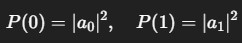

For each step, it creates a bar graph, saves it as PNG, and compiles into a GIF:
imageio.mimsave(gif_name, frames, duration=2000, loop=0)

In [ ]:
# --------------------------
# 6. Simple measurement experiment (extra points)
# --------------------------
import random

def measure_in_computational_basis(state, num_shots=100):
    """
    Simulate measuring the given 1-qubit state in the {|0>, |1>} basis
    for a given number of shots. Returns counts of 0s and 1s.
    """
    a0 = state[0, 0]
    a1 = state[1, 0]
    p0 = abs(a0)**2
    p1 = abs(a1)**2

    counts = {0: 0, 1: 0}
    for _ in range(num_shots):
        outcome = np.random.choice([0, 1], p=[p0, p1])
        counts[outcome] += 1
    return counts

counts = measure_in_computational_basis(psi3, num_shots=200)
print("Measurement experiment on final state (200 shots):", counts)

code runs: counts = measure_in_computational_basis(psi3, num_shots=200) Because the final state is:∣ψ3​⟩=∣1⟩

Expect 200 measurements: {0: 0, 1: 200}